BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.
Business Use Case


There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

Project Description
Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.
About The Dataset
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 



You are provided with following 2 files:
1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.
2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.
 
Dataset Attributes
Here is the description of all the variables:
•	Variable: Definition
•	ID: Unique client ID
•	age: Age of the client
•	job: Type of job
•	marital: Marital status of the client
•	education: Education level
•	default: Credit in default.
•	housing: Housing loan
•	loan: Personal loan
•	contact: Type of communication
•	month: Contact month
•	day_of_week: Day of week of contact
•	duration: Contact duration
•	campaign: number of contacts performed during this campaign to the client
•	pdays: number of days that passed by after the client was last contacted
•	previous: number of contacts performed before this campaign
•	poutcome: outcome of the previous marketing campaign
Output variable (desired target):
•	Subscribed (target): has the client subscribed a term deposit? (YES/NO)



Dataset Link-
•	https://github.com/dsrscientist/dataset5
•	https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv
•	https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [3]:
train_csv = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv', index_col= "ID")
test_csv = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv', index_col="ID")

In [79]:
train_csv.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,,,,,,,,,,,,,,,,,
26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [5]:
train_csv.shape

(31647, 17)

The ID does not contribut to our the model performance hence I have made it to index

In [6]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31647 entries, 26110 to 14156
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         31647 non-null  int64 
 1   job         31647 non-null  object
 2   marital     31647 non-null  object
 3   education   31647 non-null  object
 4   default     31647 non-null  object
 5   balance     31647 non-null  int64 
 6   housing     31647 non-null  object
 7   loan        31647 non-null  object
 8   contact     31647 non-null  object
 9   day         31647 non-null  int64 
 10  month       31647 non-null  object
 11  duration    31647 non-null  int64 
 12  campaign    31647 non-null  int64 
 13  pdays       31647 non-null  int64 
 14  previous    31647 non-null  int64 
 15  poutcome    31647 non-null  object
 16  subscribed  31647 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.3+ MB


the same number of non-null shows that there are no null values; we have both categorical data (object datatype) and numerical data(int64), and rows x columns (shape) = (31647, 18)

In [7]:
categorical_data = []
numerical_data=[]

for column in train_csv.columns:
    if train_csv[column].dtypes == "object":
        categorical_data.append(column)
    else:
        numerical_data.append(column)


In [8]:
train_csv.isnull().sum().sum()

0

no nul values confirmed

## Data descrition

In [9]:
# descrition of numerical data 
train_csv.describe()

,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


This is the statistical description of out data:
- we have the same count value throughtout and all data is positive which means we have no missing values. 
- mean value is bigger than the value @ 50% apart from "day"; we suspect skewness to the right for all except day
- I do also suspect outliers in the numerical data since @ 75% <<< @max

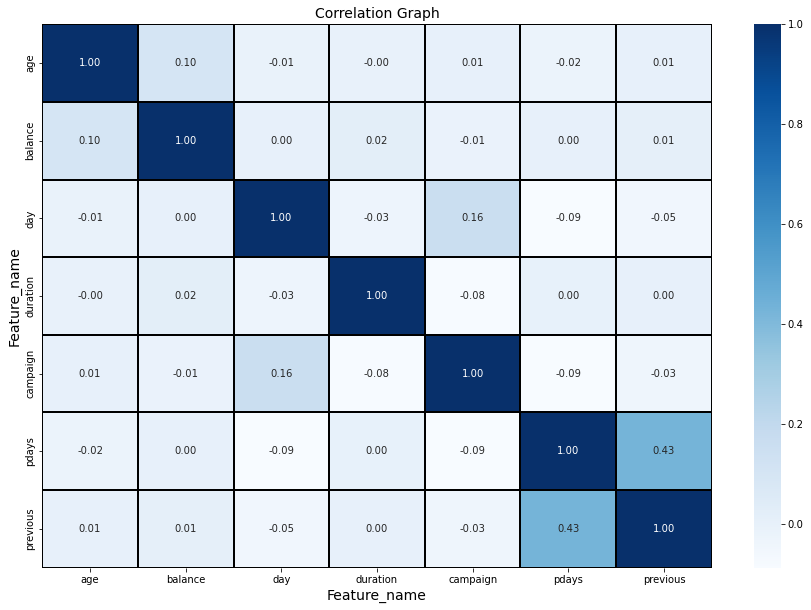

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(train_csv.corr(), annot=True, fmt="0.2f", linewidths=0.2, linecolor="black", cmap=plt.cm.Blues)
plt.xlabel('Feature_name', fontsize=14)
plt.ylabel('Feature_name', fontsize =14)
plt.title("Correlation Graph", fontsize =14)
plt.show()

we can observe some few positive correlation amoung themselves with can lead to multi collinearity (such as previous and pdays)

In [11]:
list(enumerate(numerical_data))

[(0, 'age'),
 (1, 'balance'),
 (2, 'day'),
 (3, 'duration'),
 (4, 'campaign'),
 (5, 'pdays'),
 (6, 'previous')]

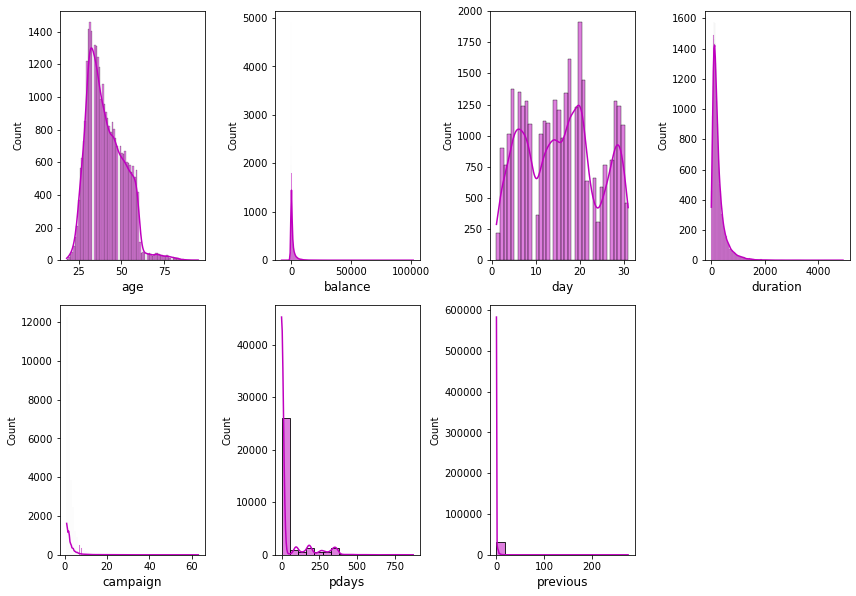

In [12]:
plt.figure(figsize=(12, 12), facecolor="white")

features = numerical_data

for i, col in enumerate(features):
    plt.subplot(3, 4, i + 1) 
    sns.histplot(train_csv[col], color="m", kde=True)
    plt.xlabel(col, fontsize=12)
    plt.xticks(rotation=0, fontsize=10)
    plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


## Bivariate analysis with Subscription status

In [13]:
list(enumerate(categorical_data))

[(0, 'job'),
 (1, 'marital'),
 (2, 'education'),
 (3, 'default'),
 (4, 'housing'),
 (5, 'loan'),
 (6, 'contact'),
 (7, 'month'),
 (8, 'poutcome'),
 (9, 'subscribed')]

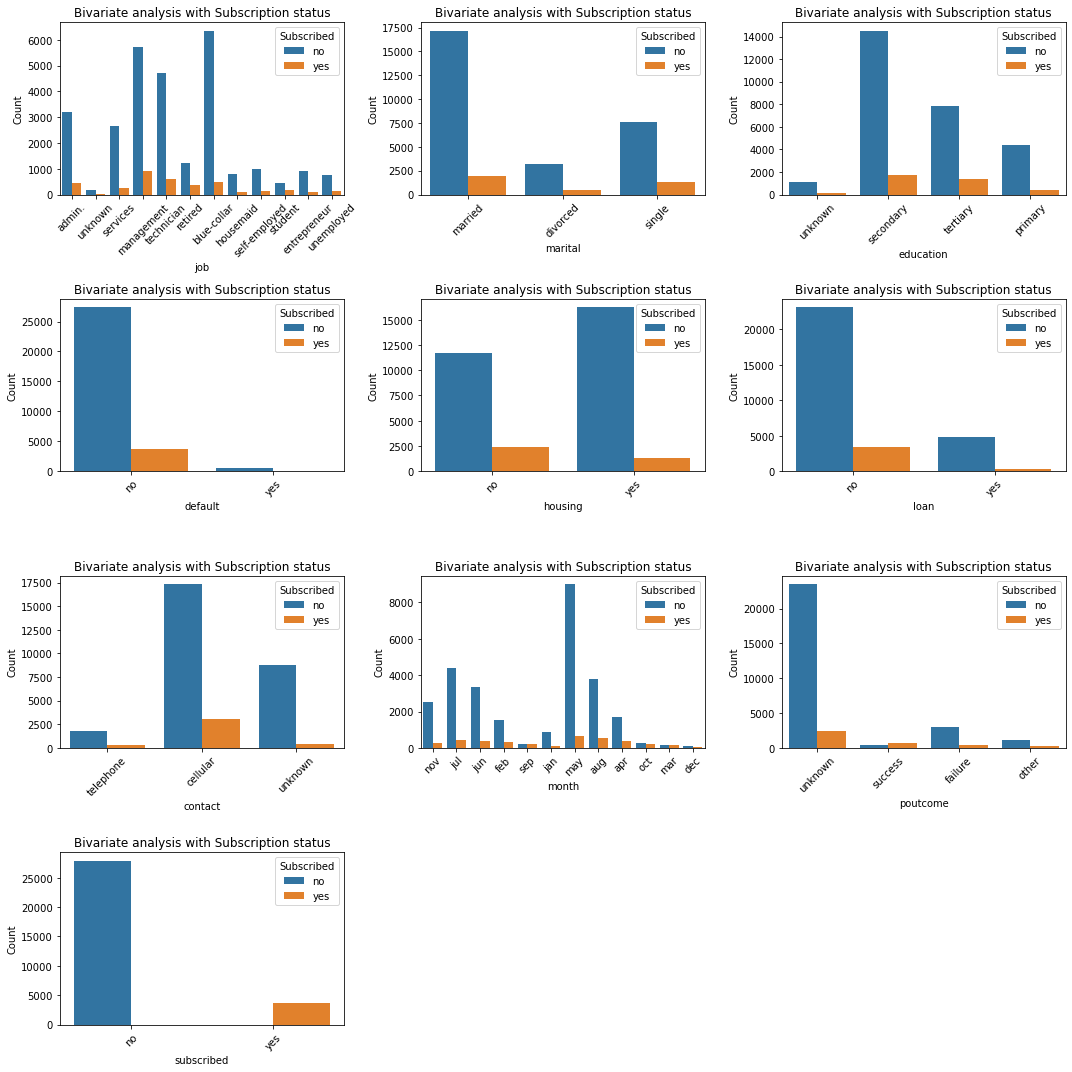

In [14]:
plt.figure(figsize=(15,15))
for i, column in enumerate(categorical_data):
    plt.subplot(4, 3, i + 1)
    sns.countplot(x=column, hue="subscribed", data=train_csv)
    plt.xlabel(column)
    plt.xticks(rotation=45, fontsize=10)
    plt.ylabel('Count')
    plt.title("Bivariate analysis with Subscription status")
    plt.legend(title='Subscribed', loc='upper right')  # Add legend for 'subscribed' categories
    plt.tight_layout()

plt.show()


These unknown factors are to be well defined to be defined because their occurances are very high.
The graphs above show that the overall counts of clients to fixed deposit is very minimal accross all the categories. 
There was more contact with clients with cellular (mobile) respect to clients with fixed telephones
Many people were contacted in average in the month of May, July, Augest and November.
The numbero of contact made during the months Oct,Mar,Dec,Sept,Jan look very negligible rispect to the average. We cannot ignore these gaps. 

In [12]:
list_range_age = []

for age in train_csv["age"]:
    if age <= 25:
        list_range_age.append("group1")
    elif 26 <= age <= 34:
        list_range_age.append("group2")
    elif 35 <= age <= 44:
        list_range_age.append("group3")
    elif 45 <= age <= 54:
        list_range_age.append("group4")
    else:
        list_range_age.append("group5")
        
len(list_range_age)


31647

Text(0.5, 1.0, 'graph age range to duration with term deposit')

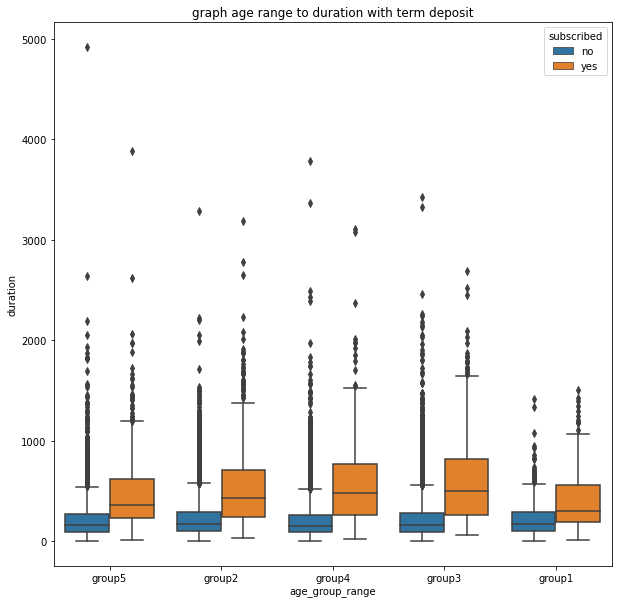

In [13]:
subset1=train_csv.loc[:, ["duration", "subscribed"]]
subset1["age_group_range"] = list_range_age

plt.figure(figsize=(10,10))
sns.boxplot(data=subset1, x="age_group_range", y="duration", hue="subscribed")
plt.title("graph age range to duration with term deposit")


The graph above shows the trend between the "age range" and the "last contact duration" with "subscribed"
we can observe that the status no counts in average is the same throught the age range but the staus yes vary throught the age range. group 5 and group 1 were have less "last contact duration". Maybe we need to target these "age rages" as well to improve the yes. 


Text(0.5, 1.0, 'graph educationto duration with term deposit')

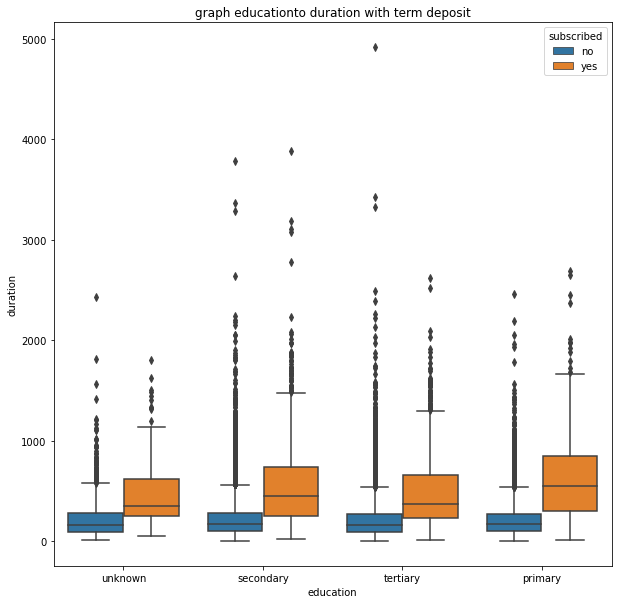

In [17]:
subset2=train_csv.loc[:, ["duration", "subscribed", "education"]]

plt.figure(figsize=(10,10))
sns.boxplot(data=subset2, x="education", y="duration", hue="subscribed")
plt.title("graph educationto duration with term deposit")

The graph above shows the trend between the "education" and the "last contact duration" with "subscribed"
we can observe that the status no counts in average is the same throught the education qualification range but the staus yes vary throught the age range. The "tertiary" and "unknown" have less "last contact duration". Maybe we need to target these "range of qualification to improve the yes 

Text(0.5, 1.0, 'graph marital to duration with term deposit')

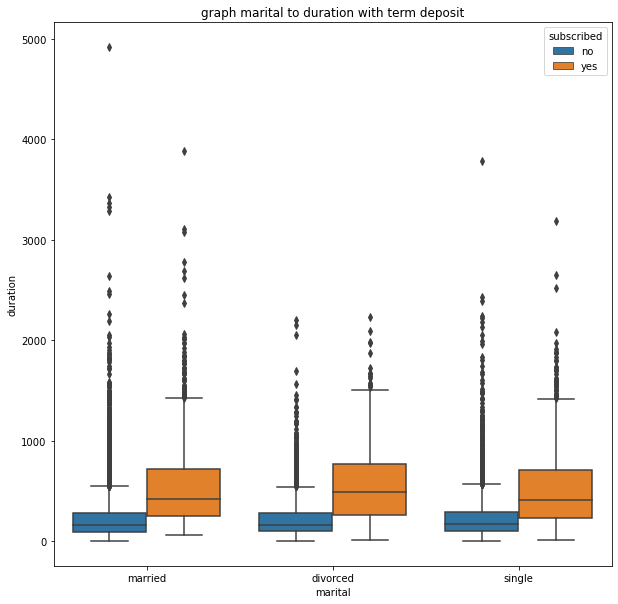

In [18]:
subset2=train_csv.loc[:, ["duration", "subscribed", "marital"]]

plt.figure(figsize=(10,10))
sns.boxplot(data=subset2, x="marital", y="duration", hue="subscribed")
plt.title("graph marital to duration with term deposit")

The graph above shows the trend between the "marital status" and the "last contact duration" with "subscribed"
we can observe that the status no counts in average is the same throught the education qualification range moreover, there is a high positive reponse with "divoced marital" while single and maried are the same in average

Text(0.5, 1.0, 'graph campaign to duration with term deposit')

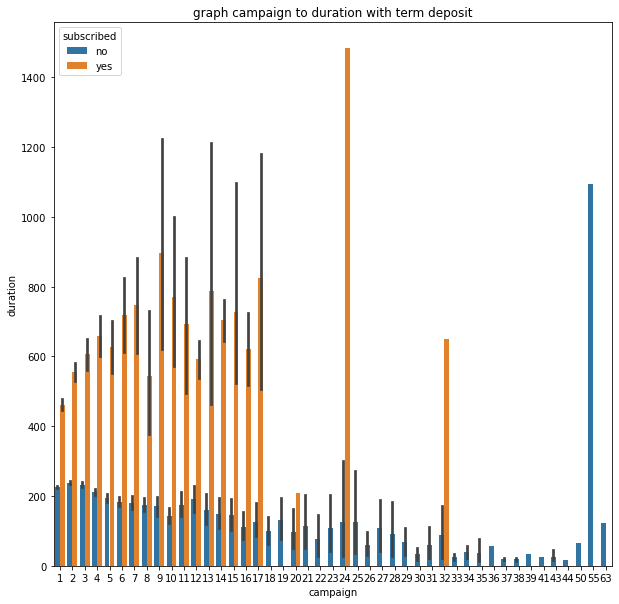

In [19]:
subset2=train_csv.loc[:, ["duration", "subscribed", "campaign"]]

plt.figure(figsize=(10,10))
sns.barplot(data=subset2, x="campaign", y="duration", hue="subscribed")
plt.title("graph campaign to duration with term deposit")

The graph above shows the trend between the "campaign" and the "last contact duration" with "subscribed"
The no status decreases linearly with the duration and vice versa the yes status increases with the campain
we can also observe that the status yes is more important (more subscription) at the beginning to the 16th. 

## Searching for Outliers

age            AxesSubplot(0.125,0.125;0.0945122x0.755)
balance     AxesSubplot(0.238415,0.125;0.0945122x0.755)
day         AxesSubplot(0.351829,0.125;0.0945122x0.755)
duration    AxesSubplot(0.465244,0.125;0.0945122x0.755)
campaign    AxesSubplot(0.578659,0.125;0.0945122x0.755)
pdays       AxesSubplot(0.692073,0.125;0.0945122x0.755)
previous    AxesSubplot(0.805488,0.125;0.0945122x0.755)
dtype: object

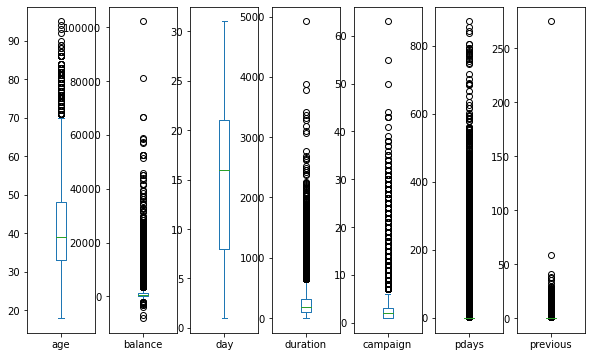

In [20]:
train_csv.plot(kind ="box", subplots=True, layout=(1,7), figsize=(10,6))

there are presence of outliers 

In [21]:
numerical_data[0:5]

['age', 'balance', 'day', 'duration', 'campaign']

## Removing outliers

In [14]:
# from scipy.stats import zscore
from scipy.stats import zscore

outliers_features = train_csv[['age', 'balance','day','duration','campaign']]
z = np.abs(zscore(outliers_features))
# threshold = 3
np.where(z>3)

(array([   21,    26,   134, ..., 31598, 31622, 31646], dtype=int64),
 array([4, 1, 4, ..., 4, 0, 3], dtype=int64))

In [15]:
df= train_csv[(z<3).all(axis=1)]
b = df.shape
a = train_csv.shape
print(df.shape)
print( train_csv.shape)

(29621, 17)
(31647, 17)


In [16]:
a = train_csv.shape
b = df.shape
print(a, b)
print("Data Loss Percentage", (((a[0]-b[0])/a[0])*100))

(31647, 17) (29621, 17)
Data Loss Percentage 6.401870635447278


data loss is less that 10% (as general rule of thumb) therefore it's acceptable the method used. other we would use another method to calculate the data loss

In [17]:
df.skew()

age          0.450185
balance      2.445199
day          0.101497
duration     1.589653
campaign     2.060107
pdays        2.611234
previous    50.241086
dtype: float64

In [18]:
for i in df.columns:
    if df[i].dtype != object:
        df[i] = df[i].apply(np.cbrt)


In [19]:
df.skew()

age         0.154016
balance    -0.442356
day        -0.571509
duration    0.288201
campaign    0.996886
pdays       1.758595
previous    2.059604
dtype: float64

skewness reduced

## ENCODING CATEGORICAL DATA

In [20]:
# Encoding categorical data using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes == "object":
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,,,,,,,,,,,,,,,,,
26110,3.825862,0.0,1.0,3.0,0.0,12.456918,0.0,0.0,1.0,2.668402,9.0,3.530348,1.259921,-1.000000,0.00000,3.0,0.0
40576,3.141381,11.0,1.0,1.0,0.0,1.442250,0.0,0.0,0.0,2.714418,5.0,4.497941,1.259921,-1.000000,0.00000,3.0,0.0
15320,3.000000,7.0,1.0,1.0,0.0,9.622603,1.0,0.0,0.0,2.620741,5.0,6.214465,1.000000,-1.000000,0.00000,3.0,0.0
43962,3.848501,4.0,0.0,2.0,0.0,14.868480,0.0,0.0,0.0,2.802039,6.0,9.535417,1.000000,4.379519,1.44225,2.0,1.0
29842,3.141381,9.0,1.0,1.0,0.0,4.918685,1.0,0.0,0.0,1.587401,3.0,7.243156,1.000000,-1.000000,0.00000,3.0,0.0


In [21]:
categorical_data = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']
df[categorical_data] = df[categorical_data].astype(int)
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,,,,,,,,,,,,,,,,,
26110,3.825862,0,1,3,0.0,12.456918,0,0,1,2.668402,9,3.530348,1.259921,-1.000000,0.00000,3,0
40576,3.141381,11,1,1,0.0,1.442250,0,0,0,2.714418,5,4.497941,1.259921,-1.000000,0.00000,3,0
15320,3.000000,7,1,1,0.0,9.622603,1,0,0,2.620741,5,6.214465,1.000000,-1.000000,0.00000,3,0
43962,3.848501,4,0,2,0.0,14.868480,0,0,0,2.802039,6,9.535417,1.000000,4.379519,1.44225,2,1
29842,3.141381,9,1,1,0.0,4.918685,1,0,0,1.587401,3,7.243156,1.000000,-1.000000,0.00000,3,0


## Splitting the data in indipendent values and dependent value

In [22]:
x = df.iloc[:, 0:16]
y = df.iloc[:, 16:17]
# dimension of the features and target
print("x.shape: ", x.shape)
print("y.shape: ", y.shape)

x.shape:  (29621, 16)
y.shape:  (29621, 1)


we have the same number of datapoints

## Normalization of the features - Standard Scalarization

In [23]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.464842,-1.312029,-0.280275,2.389226,-0.138689,0.861513,-1.134297,-0.444557,0.395185,0.515280,1.152417,-1.426962,-0.063030,-0.465147,-0.452524,0.445814
1,-0.964618,2.028204,-0.280275,-0.296845,-0.138689,-0.918005,-1.134297,-0.444557,-0.713631,0.605615,-0.183515,-0.809859,-0.063030,-0.465147,-0.452524,0.445814
2,-1.466427,0.813574,-0.280275,-0.296845,-0.138689,0.403604,0.881603,-0.444557,-0.713631,0.421718,-0.183515,0.284890,-0.945358,-0.465147,-0.452524,0.445814
3,1.545194,-0.097399,-1.925219,1.046190,-0.138689,1.251122,-1.134297,-0.444557,-0.713631,0.777627,0.150468,2.402897,-0.945358,1.524807,2.175722,-0.563469
4,-0.964618,1.420889,-0.280275,-0.296845,-0.138689,-0.356356,0.881603,-0.444557,-0.713631,-1.606855,-0.851482,0.940960,-0.945358,-0.465147,-0.452524,0.445814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29616,-0.287258,1.420889,1.364669,1.046190,-0.138689,0.616289,-1.134297,-0.444557,1.504000,-1.155888,0.150468,1.179649,-0.063030,-0.465147,-0.452524,0.445814
29617,-1.209749,-0.097399,1.364669,1.046190,-0.138689,-1.151013,0.881603,-0.444557,-0.713631,-0.228690,0.818434,-0.568107,-0.063030,-0.465147,-0.452524,0.445814
29618,1.217890,-0.097399,-1.925219,1.046190,-0.138689,0.019183,-1.134297,2.249432,-0.713631,-1.366226,0.150468,1.164949,-0.063030,-0.465147,-0.452524,0.445814
29619,-0.845994,-0.097399,1.364669,1.046190,-0.138689,-0.055253,-1.134297,-0.444557,-0.713631,-0.967800,-1.519448,-1.553321,0.555902,-0.465147,-0.452524,0.445814


In [24]:
df.corr()['subscribed'].sort_values(ascending=False)


subscribed    1.000000
duration      0.331315
previous      0.177523
pdays         0.160657
balance       0.096580
education     0.076124
marital       0.054885
job           0.038579
age          -0.013859
default      -0.016067
month        -0.028001
day          -0.033928
loan         -0.075210
campaign     -0.083512
poutcome     -0.088003
housing      -0.146441
contact      -0.156698
Name: subscribed, dtype: float64

## Checking for Variance Inflation Factor (VIF)

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif =  pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,1.284290,age
1,1.050106,job
2,1.247533,marital
3,1.064909,education
4,1.049789,default
5,1.087290,balance
6,1.173987,housing
7,1.029384,loan
8,1.338874,contact
9,1.028996,day


Normally  VIF > 1 indicates some level of multicollinearity. Multicollinearity increases with the VIF. 
Common threshold values for identifying multicollinearity VIF > 10 and therefore I will drop pdays and verify the outcome of the model (pdays is 14.02)

In [26]:
y.value_counts()

subscribed
0             26501
1              3120
dtype: int64

Here we can see that the data is not balanced, since it is a classification we will balance the data using oversampling method. 

## Oversampling

In [27]:
# oversampling the dataa
from imblearn.over_sampling import SMOTE 
SM = SMOTE()
x1,y1 = SM.fit_resample(x,y)

In [28]:
y1.value_counts()

subscribed
0             26501
1             26501
dtype: int64

## Modelling

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
np.random.seed(42)

optimal_accuracy = 0
optimal_random_state = 0 

for i in range(1, 200):
    x_train,x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=i)
    rfc = RandomForestClassifier()
    rfc.fit(x_train, y_train)
    pred = rfc.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if (acc > optimal_accuracy):
        optimal_accuracy = acc
        optimal_random_state = i
print("Best accuracy is ", optimal_accuracy, "at random_state", optimal_random_state)

Best accuracy is  0.9579284973115744 at random_state 78


In [38]:
x_train,x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=optimal_random_state)

# importing libraries
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

# Selecting the best model

rfc = RandomForestClassifier()
lg = LogisticRegression()
exc = ExtraTreesClassifier()
svc = SVC()
gbc =GradientBoostingClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()


models = [rfc, lg, exc, svc, gbc, abc, bc]
AccuracyScores = [] 

for model in models:
    model.fit(x_train, y_train)
    pred_model = model.predict(x_test)
    accuracy = accuracy_score(y_test, pred_model)
    AccuracyScores.append(accuracy)
    print("Accuracy score of", model, "is:", accuracy)
    print(confusion_matrix(y_test, pred_model))
    print(classification_report(y_test, pred_model))
    print('\n')

print("List of Accuracy Scores:", AccuracyScores)




Accuracy score of RandomForestClassifier() is: 0.9571738515234411
[[5028  317]
 [ 137 5119]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      5345
           1       0.94      0.97      0.96      5256

    accuracy                           0.96     10601
   macro avg       0.96      0.96      0.96     10601
weighted avg       0.96      0.96      0.96     10601



Accuracy score of LogisticRegression() is: 0.8232242241297991
[[4366  979]
 [ 895 4361]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      5345
           1       0.82      0.83      0.82      5256

    accuracy                           0.82     10601
   macro avg       0.82      0.82      0.82     10601
weighted avg       0.82      0.82      0.82     10601



Accuracy score of ExtraTreesClassifier() is: 0.9685878690689558
[[5070  275]
 [  58 5198]]
              precision    recall  f1-score   support

           0  

In [39]:
from sklearn.model_selection import cross_val_score

models = [rfc, lg, exc, svc, gbc, abc,bc]
Differences_Accuracy_Validation = []

for model in models:
    score = cross_val_score(model,x,y,cv=5) 
    print("Cross validare score of ", model, "is: ")
    print(score)   
    print("cross validation score mean is ", score.mean())
    print("cross validation score std is ", score.std())
    print("Difference between Accuracy score and cross validation score is", accuracy_score(y_test ,pred_model)-score.mean())
    print('\n')
    Differences_Accuracy_Validation.append(accuracy_score(y_test ,pred_model)-score.mean())
    
print("List of Differences_Accuracy_Validation :", Differences_Accuracy_Validation)
    

Cross validare score of  RandomForestClassifier() is: 
[0.91527426 0.91542876 0.91002701 0.91475354 0.91171506]
cross validation score mean is  0.9134397274050775
cross validation score std is  0.002175731379516218
Difference between Accuracy score and cross validation score is 0.02401900290338399


Cross validare score of  LogisticRegression() is: 
[0.90177215 0.90867657 0.90175557 0.90563808 0.90530047]
cross validation score mean is  0.9046285694749528
cross validation score std is  0.0026180191609102375
Difference between Accuracy score and cross validation score is 0.03283016083350865


Cross validare score of  ExtraTreesClassifier() is: 
[0.91021097 0.91070223 0.90800135 0.91137745 0.90833896]
cross validation score mean is  0.9097261913919492
cross validation score std is  0.0013276891761747592
Difference between Accuracy score and cross validation score is 0.027732538916512284


Cross validare score of  SVC() is: 
[0.9043038  0.90665091 0.9027684  0.90783255 0.90715733]
cross v

In [41]:
results = pd.DataFrame({"Accuracy_Score":AccuracyScores,"Differnce_beteen_Accuracy_Validation": Differences_Accuracy_Validation}, index=["RandomForestClassifier","LogisticRegression","ExtraTreesClassifier","SVC", "GradientBoostingClassifier","AdaBoostClassifier", "BaggingClassifier"])
results

,Accuracy_Score,Differnce_beteen_Accuracy_Validation
RandomForestClassifier,0.957174,0.024019
LogisticRegression,0.823224,0.032830
ExtraTreesClassifier,0.968588,0.027733
SVC,0.875578,0.031716
GradientBoostingClassifier,0.918781,0.025977
AdaBoostClassifier,0.880860,0.030163
BaggingClassifier,0.937459,0.030298


Now the best model is the one with the highest "accuracy score" of each model and the minimum difference between "the accuracy score and the cross validation score"

In [43]:
sort_results = results.sort_values(by=['Accuracy_Score', 'Differnce_beteen_Accuracy_Validation'], ascending=[False, True])
sort_results


,Accuracy_Score,Differnce_beteen_Accuracy_Validation
ExtraTreesClassifier,0.968588,0.027733
RandomForestClassifier,0.957174,0.024019
BaggingClassifier,0.937459,0.030298
GradientBoostingClassifier,0.918781,0.025977
AdaBoostClassifier,0.880860,0.030163
SVC,0.875578,0.031716
LogisticRegression,0.823224,0.032830


ExtraTreesClassifier(), is the best model. 

## HyperTuning

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion': ['gini', 'entropy'],
    'random_state': [10, 50, 1000],  
    'max_depth': [None, 10, 30],      
    'n_jobs': [None,-1, 1],              
    'n_estimators': [50, 100, 200, 300]
}

GCV = GridSearchCV(ExtraTreesClassifier(), parameters, cv=5)
GCV.fit(x_train, y_train)


In [ ]:
GCV.best_params_

In [49]:
Final_model = RandomForestClassifier(criterion = "entropy", random_state = 50, max_depth = None, n_jobs = None, n_estimators =200)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print("accuracy score %: ", acc*100)

accuracy score %:  95.82114894821243


In [50]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print('\n')

[[5033  312]
 [ 131 5125]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      5345
           1       0.94      0.98      0.96      5256

    accuracy                           0.96     10601
   macro avg       0.96      0.96      0.96     10601
weighted avg       0.96      0.96      0.96     10601





## Saving the Data (serialization)

In [51]:
import joblib
joblib.dump(Final_model, "BANK_MARKETING.pkl")

['BANK_MARKETING.pkl']

## Pridicting with the saving model (deserialization)

In [53]:
test_csv

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
ID,,,,,,,,,,,,,,,,
38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown


In [62]:
# Encoding categorical data using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()

for i in test_csv.columns:
    if test_csv[i].dtypes == "object":
        test_csv[i] = OE.fit_transform(test_csv[i].values.reshape(-1,1))


In [63]:
test_csv.dtypes

age            int64
job          float64
marital      float64
education    float64
default      float64
balance        int64
housing      float64
loan         float64
contact      float64
day            int64
month        float64
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome     float64
dtype: object

In [64]:
test_csv.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
ID,,,,,,,,,,,,,,,,
38441,32,7.0,1.0,1.0,0.0,118,1.0,0.0,0.0,15,8.0,20,6,-1,0,3.0
40403,78,5.0,0.0,0.0,0.0,2787,0.0,0.0,1.0,1,5.0,372,1,-1,0,3.0
3709,31,6.0,2.0,2.0,0.0,144,1.0,0.0,2.0,16,8.0,676,1,-1,0,3.0
37422,57,7.0,2.0,0.0,0.0,3777,1.0,0.0,1.0,13,8.0,65,2,-1,0,3.0
12527,45,1.0,0.0,1.0,0.0,-705,0.0,1.0,2.0,3,5.0,111,1,-1,0,3.0


In [102]:
import joblib
model_loaded = joblib.load("BANK_MARKETING.pkl")

# Making prediction
prediction = model_loaded.predict(test_csv)
prediction

array([1, 1, 0, ..., 1, 1, 1])